Example showing how to use LORA models from Local

https://huggingface.co/docs/datasets/en/image_dataset#imagefolder

In [1]:
import torch
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import gc
from random import SystemRandom
randr = SystemRandom()

In [2]:
model_path='stabilityai/stable-diffusion-2-1'
lora_path='./models/lora_1_5/potion_lora/idle_Potion_Generator.safetensors'

In [2]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/fantasy_sword/fantasysword-13.safetensors'

In [2]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/game_building/GameIconResearch_build_Lora.safetensors'

In [7]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/heroes_of_my_might_magic/HOMM5_portrait_v1.safetensors'

In [2]:
model_path='runwayml/stable-diffusion-v1-5'
lora_path='./models/lora_1_5/tejag_potions_1.safetensors'

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
def disabled_safety_checker(images, clip_input):
    if len(images.shape)==4:
        num_images = images.shape[0]
        return images, [False]*num_images
    else:
        return images, False
pipe.safety_checker = disabled_safety_checker

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [4]:
pipe.load_lora_weights(lora_path, use_safetensors=True)
#pipe.unet.load_attn_procs(lora_path)

/home/tejag/projects/howdy_notebook/venv/lib/python3.11/site-packages/diffusers/loaders.py:1230: UserWarning: You have saved the LoRA weights using the old format. To convert the old LoRA weights to the new format, you can first load them in a dictionary and then create a new dictionary like the following: `new_state_dict = {f'unet'.{module_name}: params for module_name, params in old_state_dict.items()}`.
  warnings.warn(warn_message)


In [11]:
prompt = """a single magical spherical glass bottle in the middle containing green magical potion with metal cork, pixel perfect, 
small bubbles in potion, game asset, concept art, gameartpotionbottle, bioluminescent magical potion, high quality, 
claude monet"""
neg_prompt = "low quality, watermark, text"

Generating with seed = 10063004364217848822


  0%|          | 0/1000 [00:00<?, ?it/s]

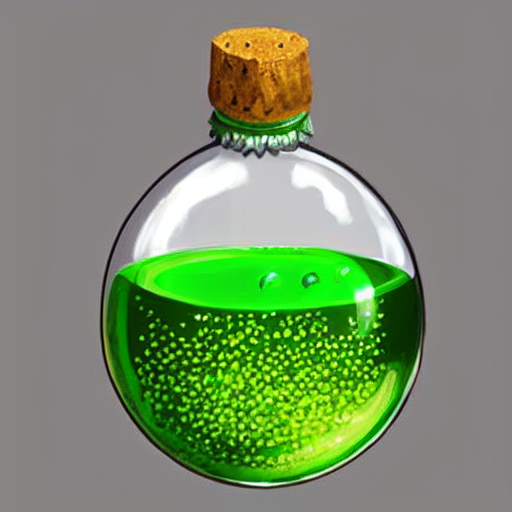

In [16]:
seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
seed = 10063004364217848822
print(f'Generating with seed = {seed}')
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt, negative_prompt=neg_prompt, width=512, height=512, num_inference_steps=1000, generator=generator).images[0]
image

In [14]:
#randr.randrange(0xFFFFFFFFFFFFFFFF)

import requests
from PIL import Image
from io import BytesIO
from math import ceil

def flex_grid(imgs, cols):
  rows=ceil(len(imgs)/cols)

  w, h = imgs[0].size
  grid = Image.new('RGB', size=(cols*w, rows*h))

  for i, img in enumerate(imgs):
      grid.paste(img, box=(i%cols*w, i//cols*h))
  return grid

Generating 1 of 4 with seed = 16784003601793915766


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 2 of 4 with seed = 10063004364217848822


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 3 of 4 with seed = 3461436904817575744


  0%|          | 0/30 [00:00<?, ?it/s]

Generating 4 of 4 with seed = 7734484360254201308


  0%|          | 0/30 [00:00<?, ?it/s]

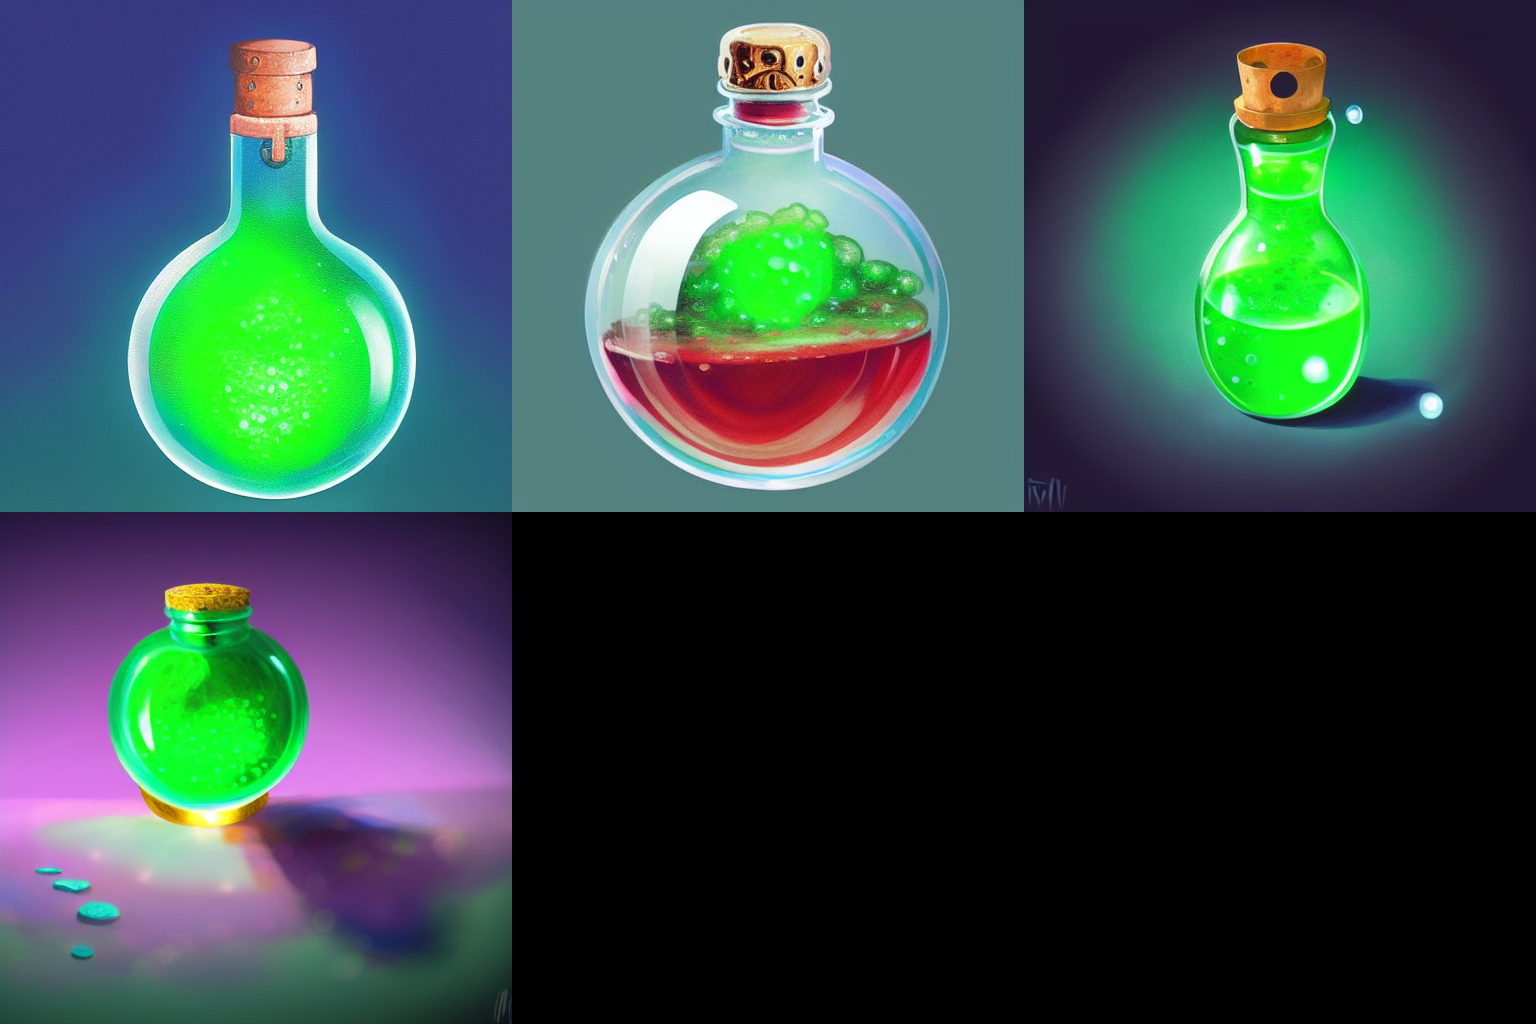

In [15]:
num_cols = 3
num_images = 4

images = []
for i in range(num_images):
  seed = randr.randrange(0xFFFFFFFFFFFFFFFF)
  print(f'Generating {i + 1} of {num_images} with seed = {seed}')
  generator = torch.Generator("cuda").manual_seed(seed)
  images.extend(pipe(prompt, negative_prompt=neg_prompt, num_inference_steps=30, generator=generator).images)
grid = flex_grid(images, cols=num_cols)
grid

In [18]:
if 'grid' in globals():
    del grid
if 'images' in globals():
    del images
if 'image' in globals():
    del image
if 'pipe' in globals():
    del pipe
gc.collect()
torch.cuda.empty_cache()
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |   8211 GiB |
|       from small pool |      0 KiB |     81 MiB |    162 GiB |    162 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |

In [19]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |   8211 GiB |
|       from small pool |      0 KiB |     81 MiB |    162 GiB |    162 GiB |
|---------------------------------------------------------------------------|
| Active memory         |   8320 KiB |   3256 MiB |   8374 GiB |   8374 GiB |
|       from large pool |   8320 KiB |   3181 MiB |   8211 GiB |

In [1]:
import safetensors.torch as t

In [2]:
model = t.load_file('./models/lora_1_5/game_building/GameIconResearch_build_Lora.safetensors')

In [5]:
model.keys()

dict_keys(['lora_te_text_model_encoder_layers_0_mlp_fc1.alpha', 'lora_te_text_model_encoder_layers_0_mlp_fc1.lora_down.weight', 'lora_te_text_model_encoder_layers_0_mlp_fc1.lora_up.weight', 'lora_te_text_model_encoder_layers_0_mlp_fc2.alpha', 'lora_te_text_model_encoder_layers_0_mlp_fc2.lora_down.weight', 'lora_te_text_model_encoder_layers_0_mlp_fc2.lora_up.weight', 'lora_te_text_model_encoder_layers_0_self_attn_k_proj.alpha', 'lora_te_text_model_encoder_layers_0_self_attn_k_proj.lora_down.weight', 'lora_te_text_model_encoder_layers_0_self_attn_k_proj.lora_up.weight', 'lora_te_text_model_encoder_layers_0_self_attn_out_proj.alpha', 'lora_te_text_model_encoder_layers_0_self_attn_out_proj.lora_down.weight', 'lora_te_text_model_encoder_layers_0_self_attn_out_proj.lora_up.weight', 'lora_te_text_model_encoder_layers_0_self_attn_q_proj.alpha', 'lora_te_text_model_encoder_layers_0_self_attn_q_proj.lora_down.weight', 'lora_te_text_model_encoder_layers_0_self_attn_q_proj.lora_up.weight', 'lora_t